<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Comp/See_in_the_dark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!nvidia-smi

Sun Jul 11 11:27:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
long_exp = '/content/drive/MyDrive/dark_data/png_format/long'
short_exp = '/content/drive/MyDrive/dark_data/png_format/short'

In [4]:
import random 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

im_p = long_exp +'/' +  random.choice(os.listdir(long_exp))

In [5]:
def plot_images(long = True):
  from matplotlib.pyplot import figure
  rows, columns = 2 , 2
  for i in range(1, 5):
    if long == True: 
      full_path = long_exp +'/' +  random.choice(os.listdir(long_exp))
      img = mpimg.imread(im_p)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.imshow(img)
      plt.axis(False)
    else:
      full_path = short_exp +'/' +  random.choice(os.listdir(short_exp))
      img = mpimg.imread(im_p)
      figure(figsize=(10, 6))
      plt.subplot(rows , columns , i)
      plt.axis(False)
      plt.imshow(img)

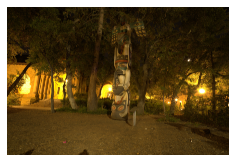

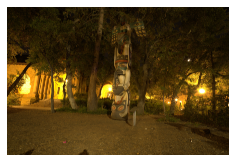

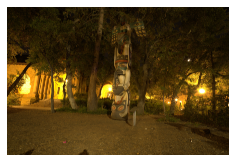

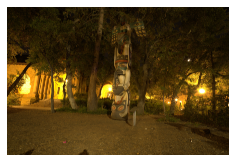

In [6]:
plot_images(long = False)

In [7]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 9.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [9]:
import pandas as pd 
col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']
dum = pd.read_csv('/content/drive/MyDrive/dark_data/Sony_train_list.txt' , sep=' ' , names= col_names)
dum

,short_exp,long_exp,ISO,aperture
0,./Sony/short/00001_00_0.04s.ARW,./Sony/long/00001_00_10s.ARW,ISO200,F8
1,./Sony/short/00001_00_0.1s.ARW,./Sony/long/00001_00_10s.ARW,ISO200,F8
2,./Sony/short/00001_01_0.04s.ARW,./Sony/long/00001_00_10s.ARW,ISO200,F8
3,./Sony/short/00001_01_0.1s.ARW,./Sony/long/00001_00_10s.ARW,ISO200,F8
4,./Sony/short/00001_02_0.1s.ARW,./Sony/long/00001_00_10s.ARW,ISO200,F8
...,...,...,...,...
1860,./Sony/short/00232_05_0.04s.ARW,./Sony/long/00232_00_10s.ARW,ISO10000,F4.5
1861,./Sony/short/00232_06_0.04s.ARW,./Sony/long/00232_00_10s.ARW,ISO10000,F4.5
1862,./Sony/short/00232_07_0.04s.ARW,./Sony/long/00232_00_10s.ARW,ISO10000,F4.5
1863,./Sony/short/00232_08_0.04s.ARW,./Sony/long/00232_00_10s.ARW,ISO10000,F4.5


In [47]:
dum['short_exp'].apply(lambda x: x[:-3]) + 'jpg'

0       ./Sony/short/00001_00_0.04s.jpg
1        ./Sony/short/00001_00_0.1s.jpg
2       ./Sony/short/00001_01_0.04s.jpg
3        ./Sony/short/00001_01_0.1s.jpg
4        ./Sony/short/00001_02_0.1s.jpg
                     ...               
1860    ./Sony/short/00232_05_0.04s.jpg
1861    ./Sony/short/00232_06_0.04s.jpg
1862    ./Sony/short/00232_07_0.04s.jpg
1863    ./Sony/short/00232_08_0.04s.jpg
1864    ./Sony/short/00232_09_0.04s.jpg
Name: short_exp, Length: 1865, dtype: object

In [10]:
def preprocess_dataframe(txt_path , add_path = 'drive/MyDrive/dark_data'):
  '''
  Pass a txt_path and this function does the following things: 
  1. Load in the txt file as a dataframe and add the right column names
  2. Remove the dots trailing with each element in a row
  5. Add a full path 
  '''
  # Column names
  col_names = ['short_exp' , 'long_exp' , 'ISO' , 'aperture']

  # Loading the txt and renaming the columns 
  df = pd.read_csv(txt_path , sep = ' ' , names = col_names)

  # Remove the trailing dots and adding full directory path 
  for col in df.columns[:2]:
    df[col] = df[col].apply(lambda x: x[:-3]) + 'jpg'
    df[col] = df[col].apply(lambda x: x[1:])
    df[col] = add_path + df[col].astype(str)

  return df 

In [11]:
train_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_train_list.txt',add_path='/content/drive/MyDrive')
val_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_val_list.txt',add_path='/content/drive/MyDrive')
test_df = preprocess_dataframe(txt_path = '/content/drive/MyDrive/dark_data/Sony_test_list.txt',add_path='/content/drive/MyDrive')

# Shape of the dataset 
train_df.shape , val_df.shape , test_df.shape

((1865, 4), (234, 4), (598, 4))

In [12]:
test= train_df.append(val_df, ignore_index=True)
test.head()

,short_exp,long_exp,ISO,aperture
0,/content/drive/MyDrive/Sony/short/00001_00_0.0...,/content/drive/MyDrive/Sony/long/00001_00_10s.jpg,ISO200,F8
1,/content/drive/MyDrive/Sony/short/00001_00_0.1...,/content/drive/MyDrive/Sony/long/00001_00_10s.jpg,ISO200,F8
2,/content/drive/MyDrive/Sony/short/00001_01_0.0...,/content/drive/MyDrive/Sony/long/00001_00_10s.jpg,ISO200,F8
3,/content/drive/MyDrive/Sony/short/00001_01_0.1...,/content/drive/MyDrive/Sony/long/00001_00_10s.jpg,ISO200,F8
4,/content/drive/MyDrive/Sony/short/00001_02_0.1...,/content/drive/MyDrive/Sony/long/00001_00_10s.jpg,ISO200,F8


In [13]:
test['short_exp'][0].apply(lambda x: x[1:])

AttributeError: ignored

In [14]:
from fastai.vision.all import * 
from fastai import * 
data_path = '/content/drive/MyDrive/dark_data/png_format/'

In [23]:
def get_dls(bs:int, size:int , path):
  "Generates two `GAN` DataLoaders"
  dblock = DataBlock(blocks=(ImageBlock, ImageBlock),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   item_tfms=Resize(size),
                   batch_tfms=[*aug_transforms(max_zoom=2.),
                               Normalize.from_stats(*imagenet_stats)])
  dls = dblock.dataloaders(path , bs=bs)
  dls.c = 3 # For 3 channel image
  return dls

In [24]:
dls = get_dls(32 , 224, data_path)

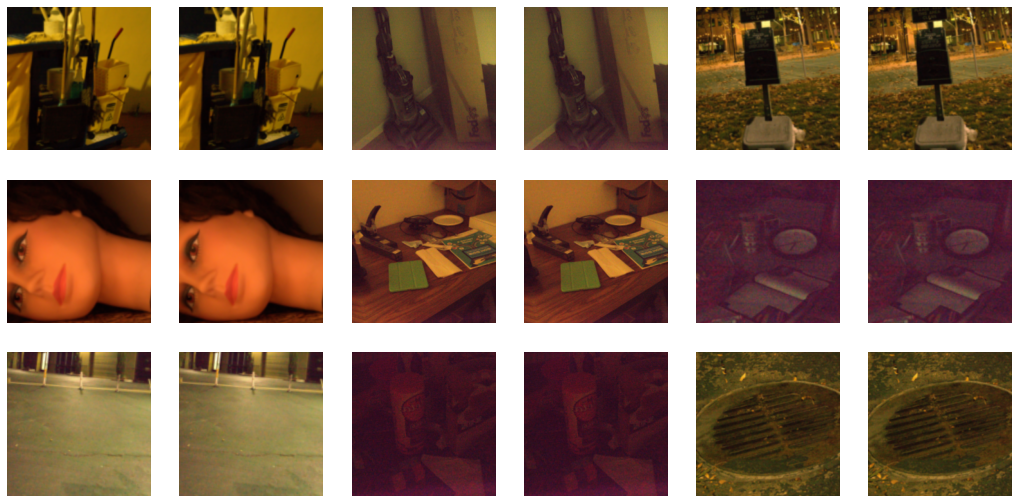

In [25]:
dls.show_batch()

In [17]:
dls = dblock.dataloaders(data_path , bs=32)

In [32]:
dls = DataLoaders.from_dblock(source = test,dblock =  DataBlock(blocks=(ImageBlock, ImageBlock),
                           get_x=ColReader('short_exp'),
                           get_y=ColReader('long_exp')),bs = 32)

TypeError: ignored

In [28]:
wd , y_range , loss_gen = 1e-3 , (-3 , 3) , MSELossFlat()
bbone = resnet34 


In [27]:

# Creating the learner
cfg = unet_config(blur = True , norm_type = NormType.Weight , self_attention = True , 
                  y_range = y_range)

NameError: ignored

In [29]:
dls.c = 3

In [30]:
def create_gen_learner():
  return unet_learner(blur= True , norm_type= NormType.Weight , self_attention= True , y_range = y_range , 
                      dls = dls , arch = bbone , loss_func = loss_gen , n_out = dls.c)
  
learn_gen = create_gen_learner()

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [31]:
learn_gen.fit_one_cycle(2, pct_start=0.8, wd=wd)


epoch,train_loss,valid_loss,time


KeyboardInterrupt: ignored